In [1]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyjstat import pyjstat #for reading json-stat format
import requests
from collections import OrderedDict

from geonamescache import GeonamesCache
#from helpers import slug
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

pd.options.display.max_rows = 999
pd.options.display.max_columns = 50

%matplotlib inline


In [2]:
#plot parameters
plt.rcParams["figure.figsize"] = [20,15]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 12

In [120]:
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams["axes.labelsize"]= 20
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 18
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.color_cycle"] = multi


#### Create Chloropleth (filled map)

create chloropleth
http://ramiro.org/notebook/basemap-choropleth/

/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


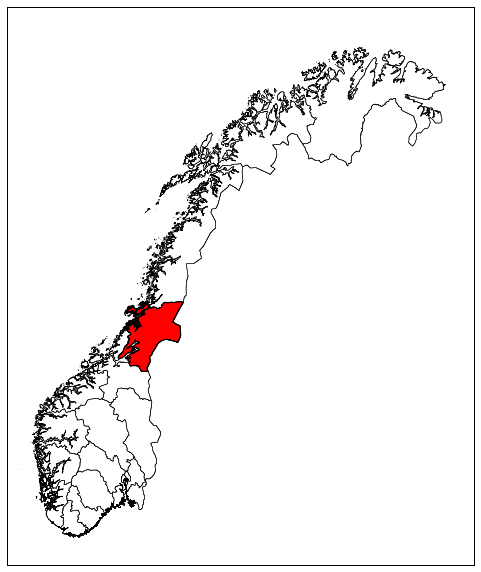

In [4]:
#based on http://ramiro.org/notebook/basemap-choropleth/

fig=plt.figure(figsize=(15,10))
ax  = fig.add_subplot(111)
# setup mercator map projection.
m = Basemap(llcrnrlon=3.,llcrnrlat=57.,\
			urcrnrlon=33.,urcrnrlat=72.,\
            resolution='i',projection='merc')
            #lat_0=2.5,lon_0=58.)

m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm0', "norway")
m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm1', "counties")

for info, shape in zip(m.counties_info, m.counties):
	if info['NAME_1']=='Nord-Trøndelag':
	  color = 'red'
	  patches = [Polygon(np.array(shape), True)]
	  pc = PatchCollection(patches)
	  pc.set_facecolor(color)
	  ax.add_collection(pc)
plt.show()
        

/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


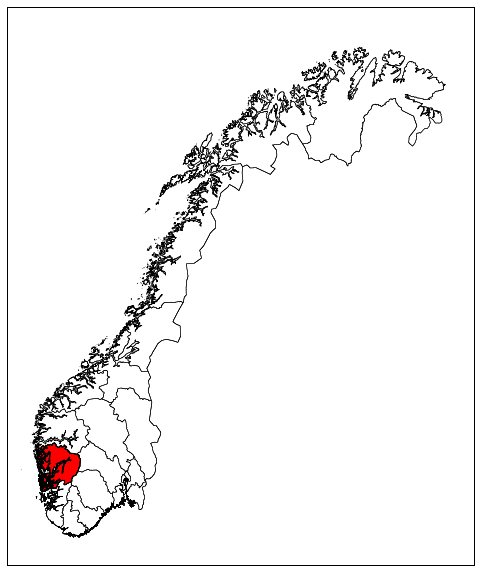

In [5]:

fig=plt.figure(figsize=(15,10))
ax  = fig.add_subplot(111)
# setup mercator map projection.
m = Basemap(llcrnrlon=3.,llcrnrlat=57.,\
			urcrnrlon=33.,urcrnrlat=72.,\
            resolution='i',projection='merc')
            #lat_0=2.5,lon_0=58.)

m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm0', "norway")
m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm1', "counties")

df = pd.DataFrame()
shapes=[]
names = []
for info, shape in zip(m.counties_info, m.counties):
	#create pandas dataframe with shape file info
	shapes.append(shape)
	names.append(info["NAME_1"])

for name, shape in zip(names, shapes):
	if name == "Hordaland":
		color = 'red'
		patches = [Polygon(np.array(shape), True)]
		pc = PatchCollection(patches)
		pc.set_facecolor(color)
		ax.add_collection(pc)       
plt.show()

In [6]:
#import data on housing prices by county
house_prices = pd.read_csv("https://data.ssb.no/api/v0/dataset/25138.csv?lang=no", sep=";")
house_prices.columns = ["region", "type", "year", "variable", "price_sq_m"]

house_prices = house_prices[house_prices.type=="02 Brukte eneboliger"]
house_prices = house_prices[house_prices.variable == "Kvadratmeterpris (kr)"]
house_prices = house_prices[house_prices.year==2014]

fylke = house_prices.region.values

fylke2 = ["Østfold", "Akershus", "Oslo", "Hedmark",
 "Oppland", "Buskerud", "Vestvold", "Telemark", "Aust-Agder",
  "Vest-Agder", "Rogaland", "Hordaland", "Sogn og Fjordane", 
  "Møre og Romsdal", "Sør-Trøndelag", "Nord-Trøndelag", "Nordland", 
  "Troms", "Finnmark"] 
fylke_dict = dict(zip(fylke, fylke2))

house_prices["counties"] = [fylke_dict[county] for county in house_prices.region]
del house_prices["region"]


/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


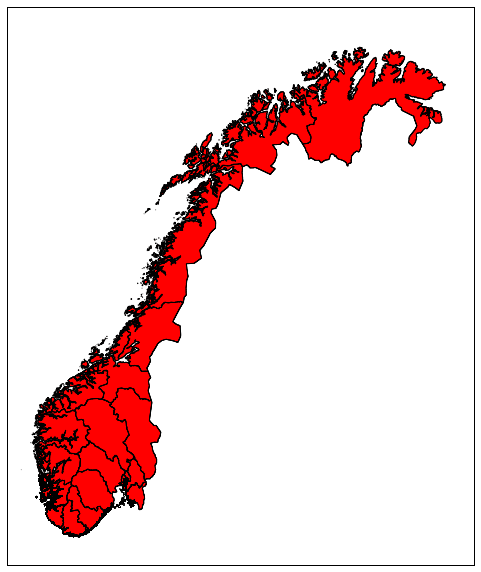

In [7]:

fig=plt.figure(figsize=(15,10))
ax  = fig.add_subplot(111)

#map instance
m = Basemap(llcrnrlon=3.,llcrnrlat=57.,\
      urcrnrlon=33.,urcrnrlat=72.,\
            resolution='i',projection='merc')
            #lat_0=2.5,lon_0=58.)

m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm0', "norway")
m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm1', "counties")

shapes=[]
names = []
for info, shape in zip(m.counties_info, m.counties):
  shapes.append(shape)
  names.append(info["NAME_1"])

names_series = pd.Series(names)
names_series = names_series[~names_series.duplicated()]

names_series2 = ["Østfold"]
for f in names_series[1:]:
  names_series2.append(f)

shape_fylke_dict2 = dict(zip(names_series, names_series2))

#now create dataframe with shapefiles and names
df_shape = pd.DataFrame()
df_shape["counties"] = [shape_fylke_dict2[name] for name in names]
df_shape["shapes"] = shapes

df_shape = df_shape.merge(house_prices[["price_sq_m", "counties"]], on="counties")




for shape, price in zip(df_shape.shapes, df_shape.price_sq_m):
		color = 'red'
		patches = [Polygon(np.array(shape), True)]
		pc = PatchCollection(patches)
		pc.set_facecolor(color)
		ax.add_collection(pc)       
plt.show()

/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


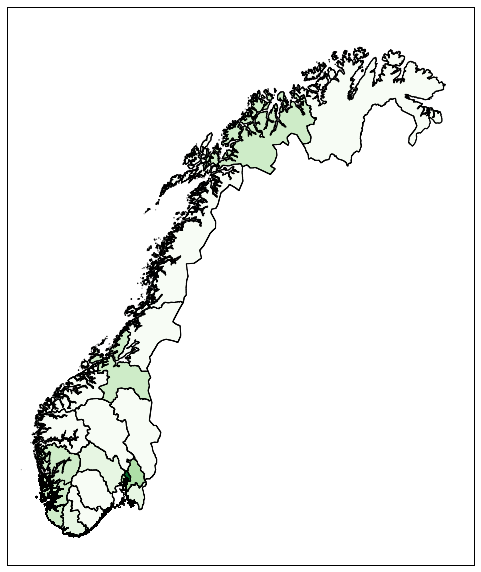

In [8]:
fig=plt.figure(figsize=(15,10))
ax  = fig.add_subplot(111)

#map instance
m = Basemap(llcrnrlon=3.,llcrnrlat=57.,\
      urcrnrlon=33.,urcrnrlat=72.,\
            resolution='i',projection='merc')
            #lat_0=2.5,lon_0=58.)

m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm0', "norway")
m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm1', "counties")

shapes=[]
names = []
for info, shape in zip(m.counties_info, m.counties):
  shapes.append(shape)
  names.append(info["NAME_1"])

names_series = pd.Series(names)
names_series = names_series[~names_series.duplicated()]

names_series2 = ["Østfold"]
for f in names_series[1:]:
  names_series2.append(f)

shape_fylke_dict2 = dict(zip(names_series, names_series2))

#now create dataframe with shapefiles and names
df_shape = pd.DataFrame()
df_shape["counties"] = [shape_fylke_dict2[name] for name in names]
df_shape["shapes"] = shapes

df_shape = df_shape.merge(house_prices[["price_sq_m", "counties"]], on="counties")
df_shape["price_sq_m"] = df_shape["price_sq_m"].astype(float)
#create different colors
num_colors = 9
values = df_shape["price_sq_m"]
cm = plt.get_cmap('Greens')
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
df_shape['bin'] = np.digitize(values, bins) - 1
#df.sort('bin', ascending=False).head(10)

def add_polys(shape_row):
  color = scheme[shape_row.bin]
  patches = [Polygon(np.array(shape_row.shapes), True)]
  pc = PatchCollection(patches)
  pc.set_facecolor(color)
  ax.add_collection(pc) 

df_shape.apply(add_polys, axis=1)

plt.show()

### Now add municipalities

Look at growth of municipalities

# Maps for website

### population, by principality, change per year / 5 year

In [96]:
pop_dyr =  pd.read_csv("http://data.ssb.no/api/v0/dataset/49577.csv?lang=no", sep=";")

folkemengde = pop_dyr[pop_dyr.statistikkvariabel=="Folkemengde"]
folkemengde.columns = ["region", "date", "variable", "population"]
folkemengde["population"] = folkemengde.population.astype(float)

def first_diff(block, periods):
  diff_block = block.diff(periods)
  return(diff_block)


pop_diff=folkemengde.groupby("region")["population"].transform(first_diff, 1)
pop_diff5 = folkemengde.groupby("region")["population"].transform(first_diff, 5)
folkemengde["pop_diff"] = pop_diff
folkemengde["pop_diff5"] = pop_diff5 
folkemengde = folkemengde[folkemengde.pop_diff.notnull()]
folkemengde = folkemengde[folkemengde.population!=0]
folkemengde["perc_diff"] = folkemengde.pop_diff/folkemengde.population*100
folkemengde["perc_diff5"] = folkemengde.pop_diff5/folkemengde.population*100


/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/johannesma

In [97]:
folkemengde["kode"] = np.array([i[0:4] for i in folkemengde.region]).astype(int)

In [98]:
folkemengde.head()
folkemengde2015 = folkemengde[folkemengde.date==2015]
folkemengde2015.head()

,region,date,variable,population,pop_diff,pop_diff5,perc_diff,perc_diff5,kode
320,0101 Halden,2015,Folkemengde,30328,196,1552,0.646267,5.117383,101
1310,0104 Moss,2015,Folkemengde,31802,494,1772,1.553361,5.571977,104
1640,0105 Sarpsborg,2015,Folkemengde,54192,133,2033,0.245424,3.751476,105
1970,0106 Fredrikstad,2015,Folkemengde,78159,568,4521,0.726724,5.784363,106
2300,0111 Hvaler,2015,Folkemengde,4480,94,395,2.098214,8.816964,111


In [100]:
folkemengde2015 = folkemengde2015[folkemengde2015.perc_diff5.notnull()]
folkemengde2015 = folkemengde2015[folkemengde2015.perc_diff5 != 100]
folkemengde2015 = folkemengde2015[folkemengde2015.perc_diff5 != -100]

In [101]:
folkemengde2015.perc_diff5

320        5.117383
1310       5.571977
1640       3.751476
1970       5.784363
2300       8.816964
4610      -1.280228
4940       3.930252
5930      -2.380952
6260       4.751216
6590       9.223472
6920       4.183588
7250       4.685986
7910       5.092469
8240       6.271820
10550      4.496253
10880      6.226217
11210     12.313725
11540     11.248362
12530     11.876150
13190      5.884131
13520     11.441388
13850      6.604497
14180      5.573699
14510      6.388262
14840      7.848531
15170      8.306055
15500      9.105939
17480     10.064954
17810      8.581123
18140      9.275531
18470      5.427509
18800      6.855630
19130      7.737071
19790      7.782084
20120      7.982928
20450     12.674872
20780      7.756002
21110     10.969102
21440      8.037367
21770      4.905523
22430      9.389880
23090      2.818634
23420      5.035682
24080      3.211023
25070      3.707627
25730      4.542048
26060      0.195008
26390      0.115385
26720     -1.736614
27710     -4.636307


/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


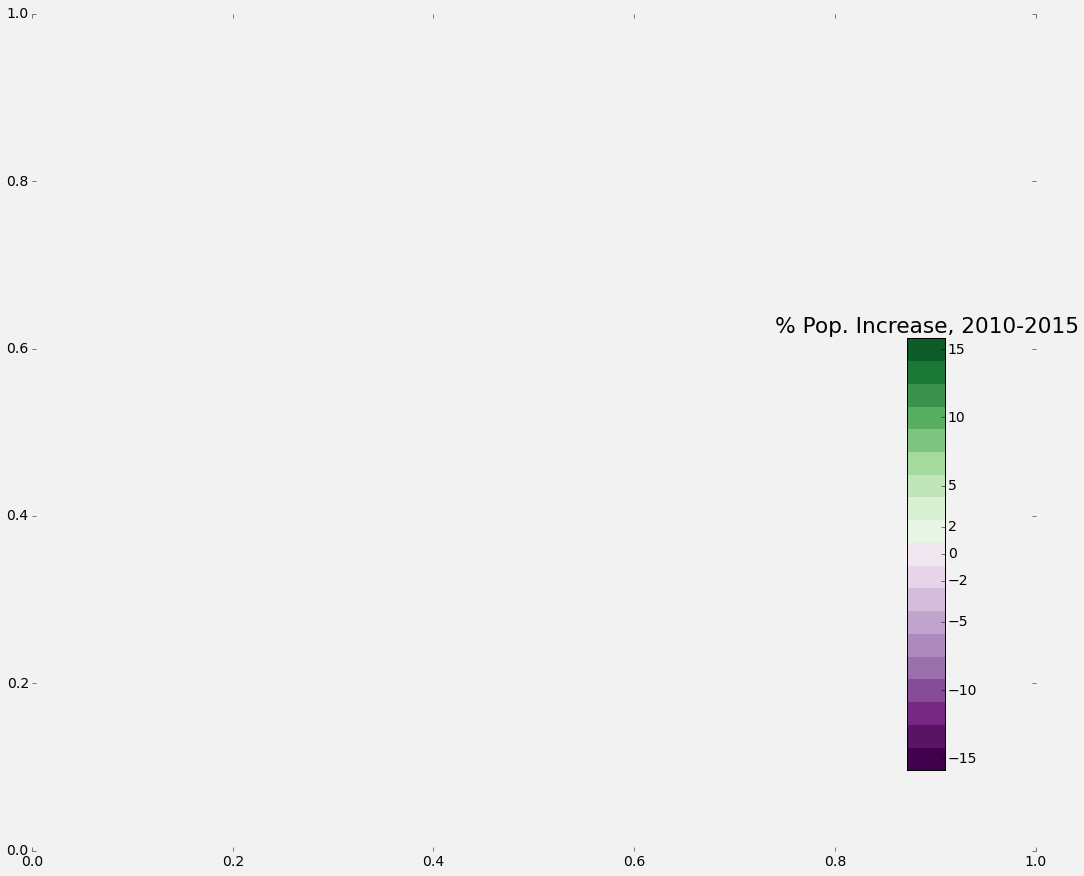

In [122]:
fig=plt.figure(figsize=(18,15))
ax  = fig.add_subplot(111)
ax.set_frame_on(False)


#map instance
#m = Basemap(llcrnrlon=3.,llcrnrlat=57.,\
      #urcrnrlon=33.,urcrnrlat=72.,\
       #     resolution='i',projection='merc')
            #lat_0=2.5,lon_0=58.)

#m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm0', "norway")
#m.readshapefile('norway_shape/kartverket/kommuner/kommuner', "princ", drawbounds=False)


shapes=[]
kode = []
names = []
for info, shape in zip(m.princ_info, m.princ):
  shapes.append(shape)
  kode.append(info["komm"])
  names.append(info["navn"])

df_folkemengde2015 = pd.DataFrame()
df_folkemengde2015["shapes"] = shapes
df_folkemengde2015["kode"] = kode

#merge with ssb data
df_folkemengde2015 = df_folkemengde2015.merge(folkemengde2015, on="kode", how="left")

#create different colors for map
num_colors = 20
values = df_folkemengde2015["perc_diff5"].astype(float)
cm = plt.get_cmap('PRGn')
scheme = [cm(i / num_colors) for i in range(num_colors)]
absmax = np.max([abs(values.min()), values.max()])
bins = np.linspace(-absmax, absmax, num_colors)
df_folkemengde2015['bin'] = np.digitize(values, bins) - 1
df_folkemengde2015.sort_values('bin', ascending=False)

#def add_polys(shape_row):
#  color = scheme[shape_row.bin]
#  patches = [Polygon(np.array(shape_row.shapes), True)]
#  pc = PatchCollection(patches)
#  pc.set_facecolor(color)
#  pc.set_edgecolor(color)
#  ax.add_collection(pc) 

#df_folkemengde2015.apply(add_polys, axis=1)

# Draw color legend.
#left, bottom, width, height
ticks = [-15,-10,-5,-2, 0, 2,5, 10,15]
ax_legend = fig.add_axes([0.8, 0.20, 0.03, 0.4], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=ticks, boundaries=bins, orientation='vertical')
#cb.ax.set_xticklabels([-15,-10,-5,-2, 0, 2,5, 10,15])
cb.ax.set_title("% Pop. Increase, 2010-2015")
plt.show()

/Users/johannesmauritzen/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


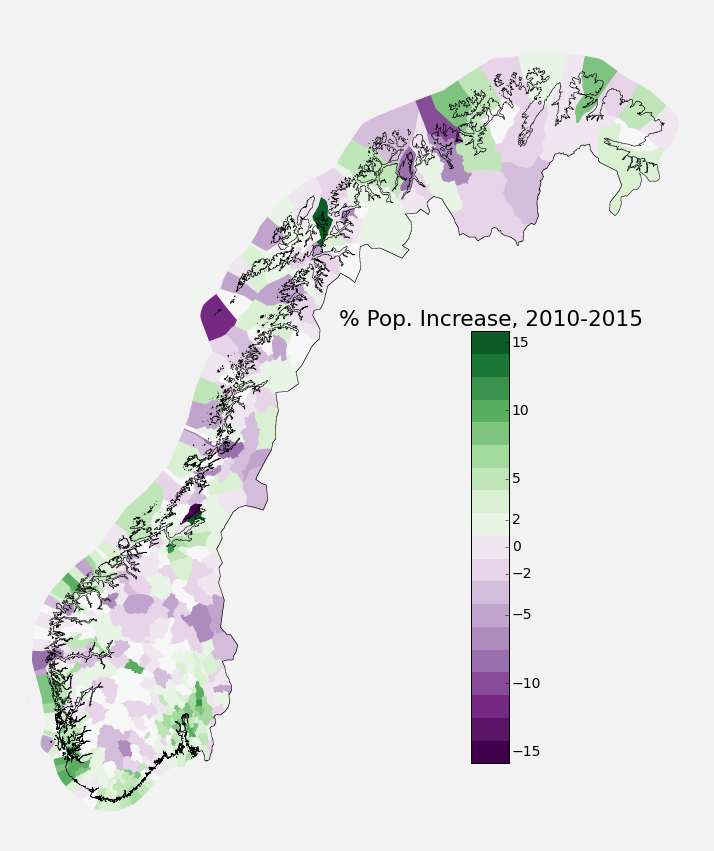

In [123]:
fig=plt.figure(figsize=(18,15))
ax  = fig.add_subplot(111)
ax.set_frame_on(False)

#map instance
m = Basemap(llcrnrlon=3.,llcrnrlat=57.,\
      urcrnrlon=33.,urcrnrlat=72.,\
            resolution='i',projection='merc')
            #lat_0=2.5,lon_0=58.)

m.readshapefile('norway_shape/NOR_adm_shp/NOR_adm0', "norway")
m.readshapefile('norway_shape/kartverket/kommuner/kommuner', "princ", drawbounds=False)


shapes=[]
kode = []
names = []
for info, shape in zip(m.princ_info, m.princ):
  shapes.append(shape)
  kode.append(info["komm"])
  names.append(info["navn"])

df_folkemengde2015 = pd.DataFrame()
df_folkemengde2015["shapes"] = shapes
df_folkemengde2015["kode"] = kode

#merge with ssb data
df_folkemengde2015 = df_folkemengde2015.merge(folkemengde2015, on="kode", how="left")

#create different colors for map
num_colors = 20
values = df_folkemengde2015["perc_diff5"].astype(float)
cm = plt.get_cmap('PRGn')
scheme = [cm(i / num_colors) for i in range(num_colors)]
absmax = np.max([abs(values.min()), values.max()])
bins = np.linspace(-absmax, absmax, num_colors)
df_folkemengde2015['bin'] = np.digitize(values, bins) - 1
df_folkemengde2015.sort_values('bin', ascending=False)

def add_polys(shape_row):
  color = scheme[shape_row.bin]
  patches = [Polygon(np.array(shape_row.shapes), True)]
  pc = PatchCollection(patches)
  pc.set_facecolor(color)
  pc.set_edgecolor(color)
  ax.add_collection(pc) 

df_folkemengde2015.apply(add_polys, axis=1)

#legend
ticks = [-15,-10,-5,-2, 0, 2,5, 10,15]
ax_legend = fig.add_axes([0.6, 0.20, 0.03, 0.4], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=ticks, boundaries=bins, orientation='vertical')

#cb.ax.set_xticklabels([-15,-10,-5,-2, 0, 2,5, 10,15])
cb.ax.set_title("% Pop. Increase, 2010-2015")
plt.show()

fig.savefig("figures/county_pop_map.png", bbox_inches='tight')